In [1]:
from hig_data.coco import COCOStuffDataset

img_path = '/Users/rupertmenneer/Downloads/coco_val2017_256-sd.zip'
mask_path = '/Users/rupertmenneer/Downloads/coco_val2017_masks_256.zip'
dataset = COCOStuffDataset(img_path, mask_path, 32)


In [8]:
from hig_data.coco import COCOStuffDataset, CocoStuffGraphDataset
import torch
img_path = '/Users/rupertmenneer/Downloads/coco_val2017_256-sd.zip'
mask_path = '/Users/rupertmenneer/Downloads/coco_val2017_masks_256.zip'
coco_graph = CocoStuffGraphDataset(img_path, mask_path, latent_images=True)
data = coco_graph[4]
data

RelaxedHeteroData(
  image=[1, 8, 32, 32],
  mask=[1, 1, 256, 256],
  image_node={
    x=[1024, 1],
    pos=[1024, 2],
  },
  class_node={
    x=[3, 183],
    pos=[3, 2],
  },
  (class_node, class_edge, class_node)={ edge_index=[2, 6] },
  (class_node, class_to_image, image_node)={ edge_index=[2, 971] }
)

In [ ]:
# from hig_data.visualisation import convert_latents_to_pixels
# import PIL
# import numpy as np
# print(data.image.shape)
# img = convert_latents_to_pixels(data.image)

# PIL.Image.fromarray(img)

In [9]:
from torch_geometric.loader import DataLoader as GeoDataLoader
dls = GeoDataLoader(coco_graph, batch_size=2, shuffle=True)
graph_batch = next(iter(dls))
graph_batch

RelaxedHeteroDataBatch(
  image=[2, 8, 32, 32],
  mask=[2, 1, 256, 256],
  image_node={
    x=[2048, 1],
    pos=[2048, 2],
    batch=[2048],
    ptr=[3],
  },
  class_node={
    x=[10, 183],
    pos=[10, 2],
    batch=[10],
    ptr=[3],
  },
  (class_node, class_edge, class_node)={ edge_index=[2, 42] },
  (class_node, class_to_image, image_node)={ edge_index=[2, 1877] }
)

In [10]:
graph_batch['image_node'].pos, graph_batch['class_node'].pos

(tensor([[  0.,   0.],
         [  8.,   0.],
         [ 16.,   0.],
         ...,
         [232., 248.],
         [240., 248.],
         [248., 248.]]),
 tensor([[ 68.8421, 129.0877],
         [111.7382, 141.5787],
         [225.9574, 191.4043],
         [157.2152,  27.6962],
         [ 15.4182,  56.5818],
         [109.2528, 130.3698],
         [221.0370,  82.3704],
         [123.6138, 130.1241],
         [  8.0000, 104.0000],
         [  8.0000,   0.0000]]))

(2, 256, 256, 3)


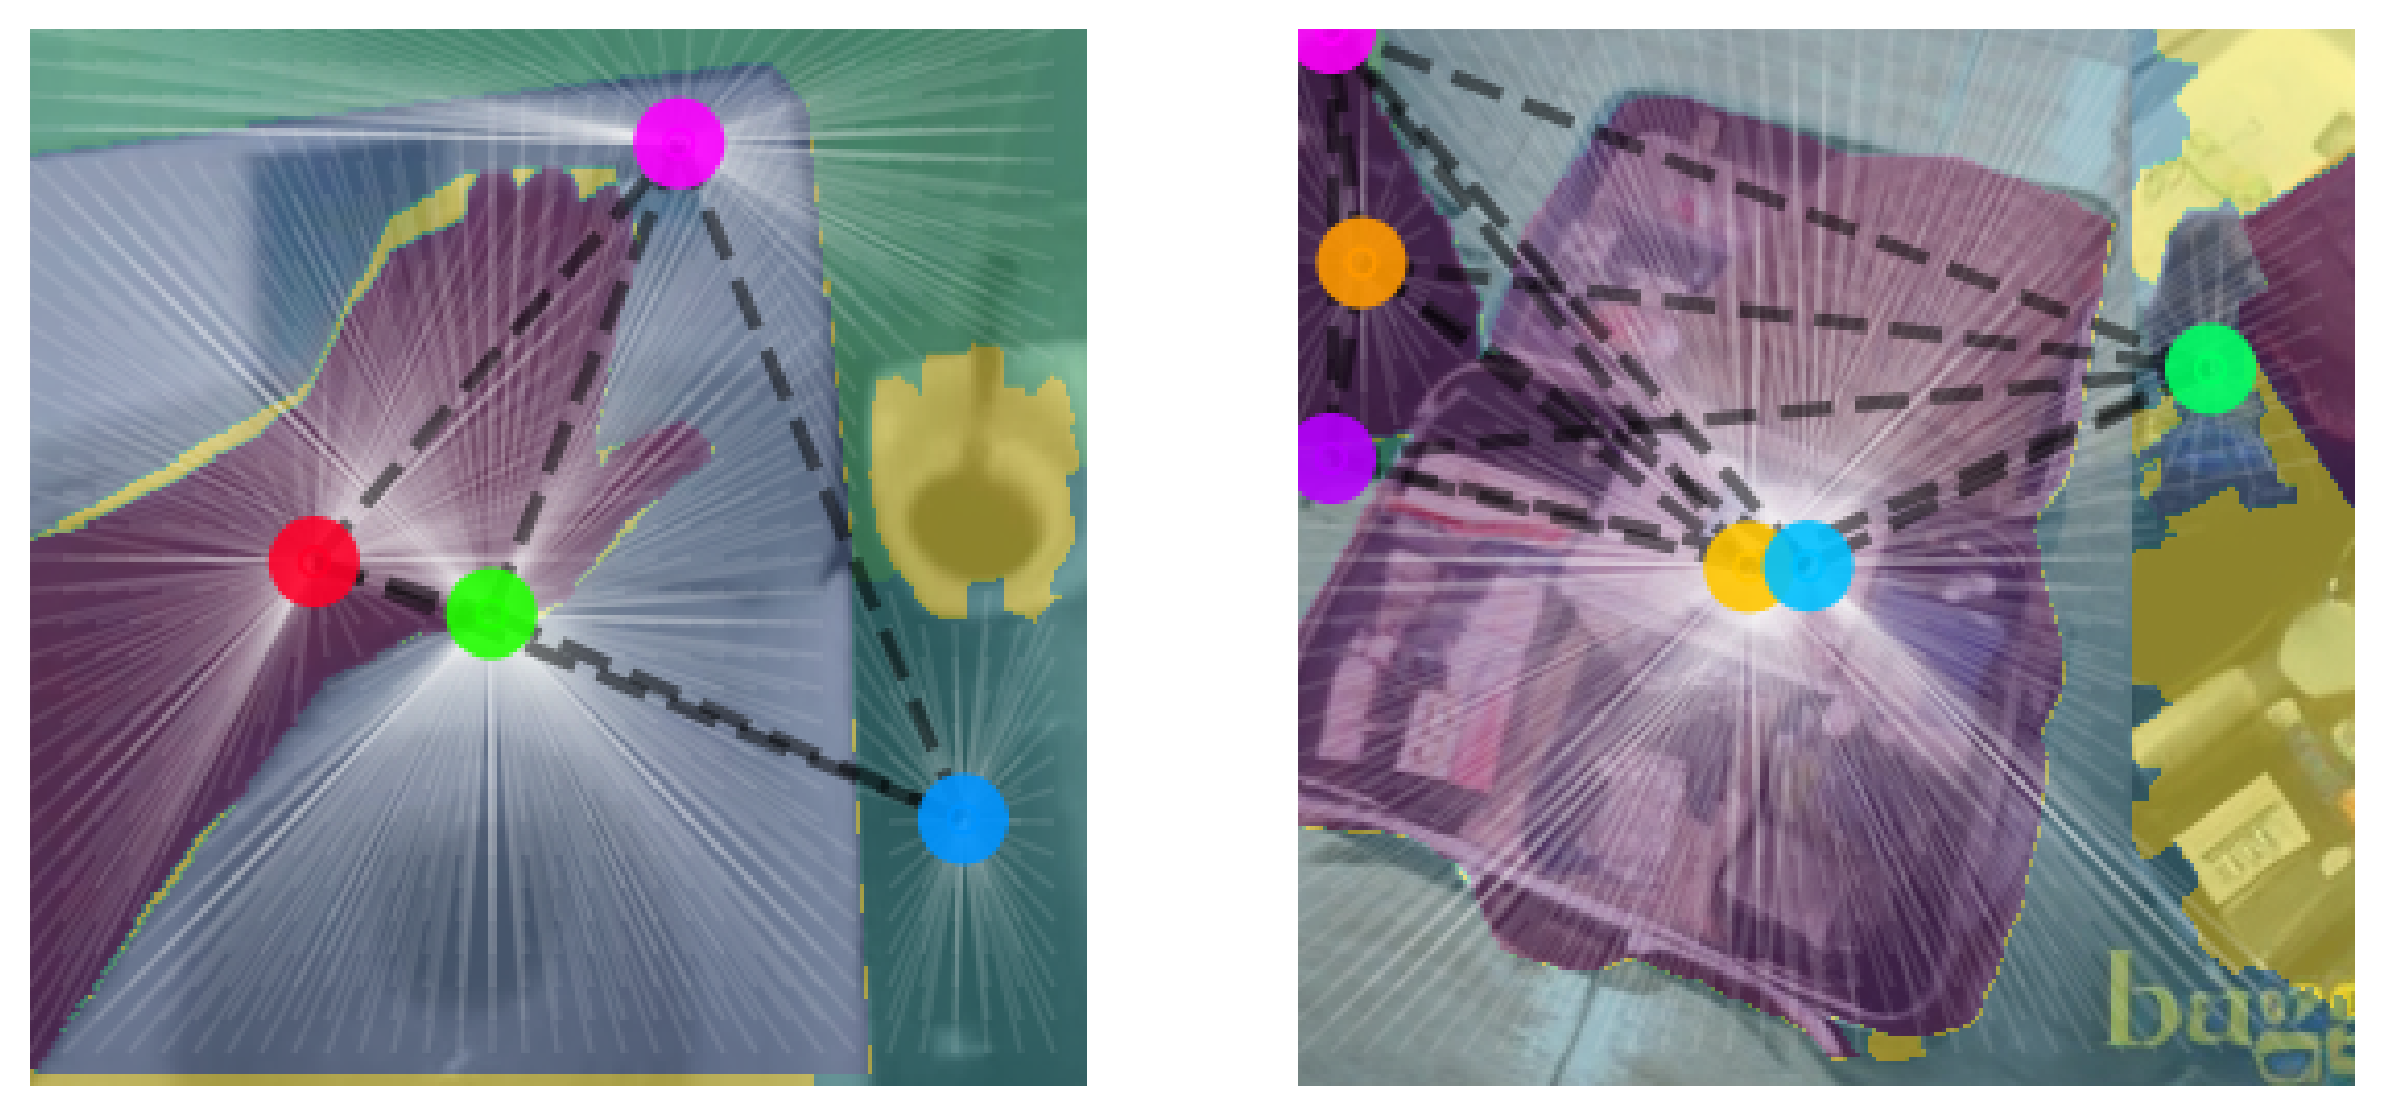

In [12]:
from hig_data.visualisation import logging_generate_sample_vis, visualise_het_graph_on_image_batch, plot_array_images
# logging_generate_sample_vis(graph_batch, resize_mask=True)
from training.encoders import StabilityVAEEncoder
vae = StabilityVAEEncoder()
img, decoded = visualise_het_graph_on_image_batch(graph_batch, vae=vae,)
print(img.shape)
plot_array_images(img)


In [ ]:
from training.networks_edm2_hignn import Precond
precond = Precond(32, 3, gnn_metadata = data.metadata())

In [ ]:
import torch
images = torch.randn(1, 3, 32, 32)
rnd_normal = torch.randn([images.shape[0], 1, 1, 1], device=images.device)
sigma = (rnd_normal).exp()

data = coco_graph[1]
out = precond(images, sigma, data)
out.shape